<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week6_Day2_Lesson1%2Badditional_materials_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

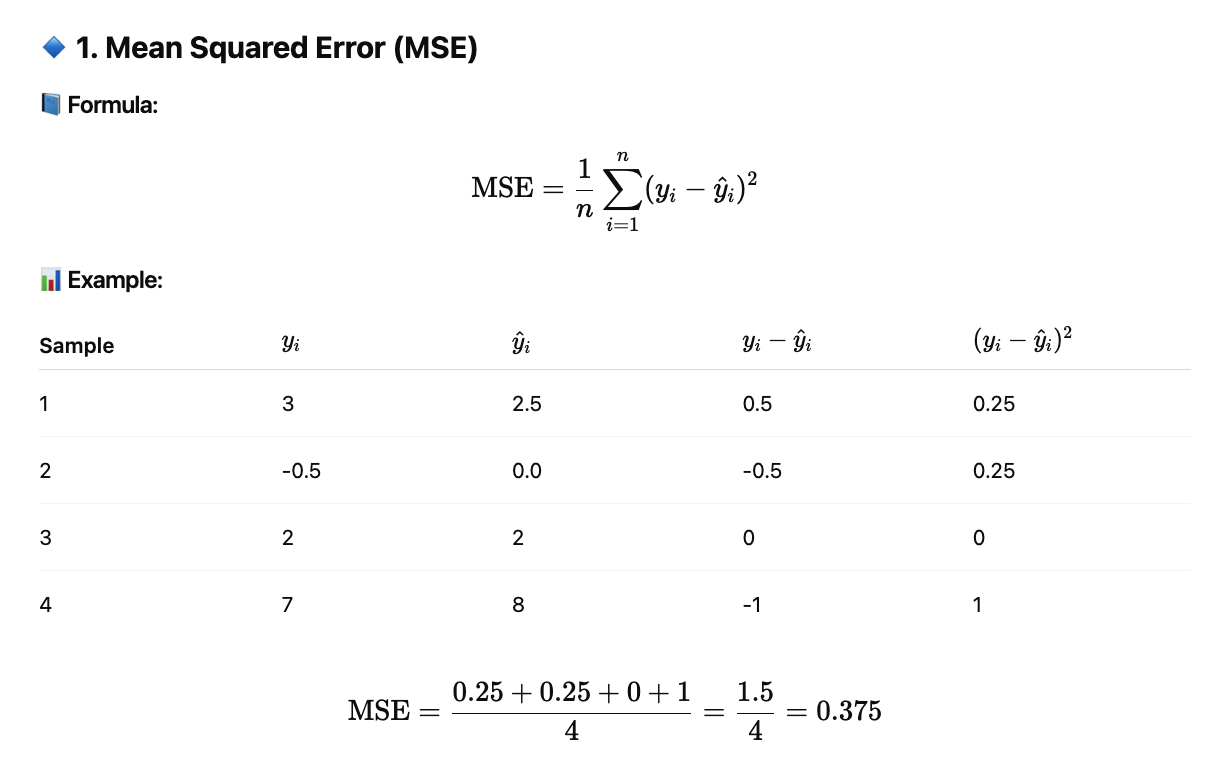

In [ ]:
import numpy as np

# True and predicted values
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Mean Squared Error
mse = np.mean((y_true - y_pred)**2)
print("MSE:", mse)


MSE: 0.375


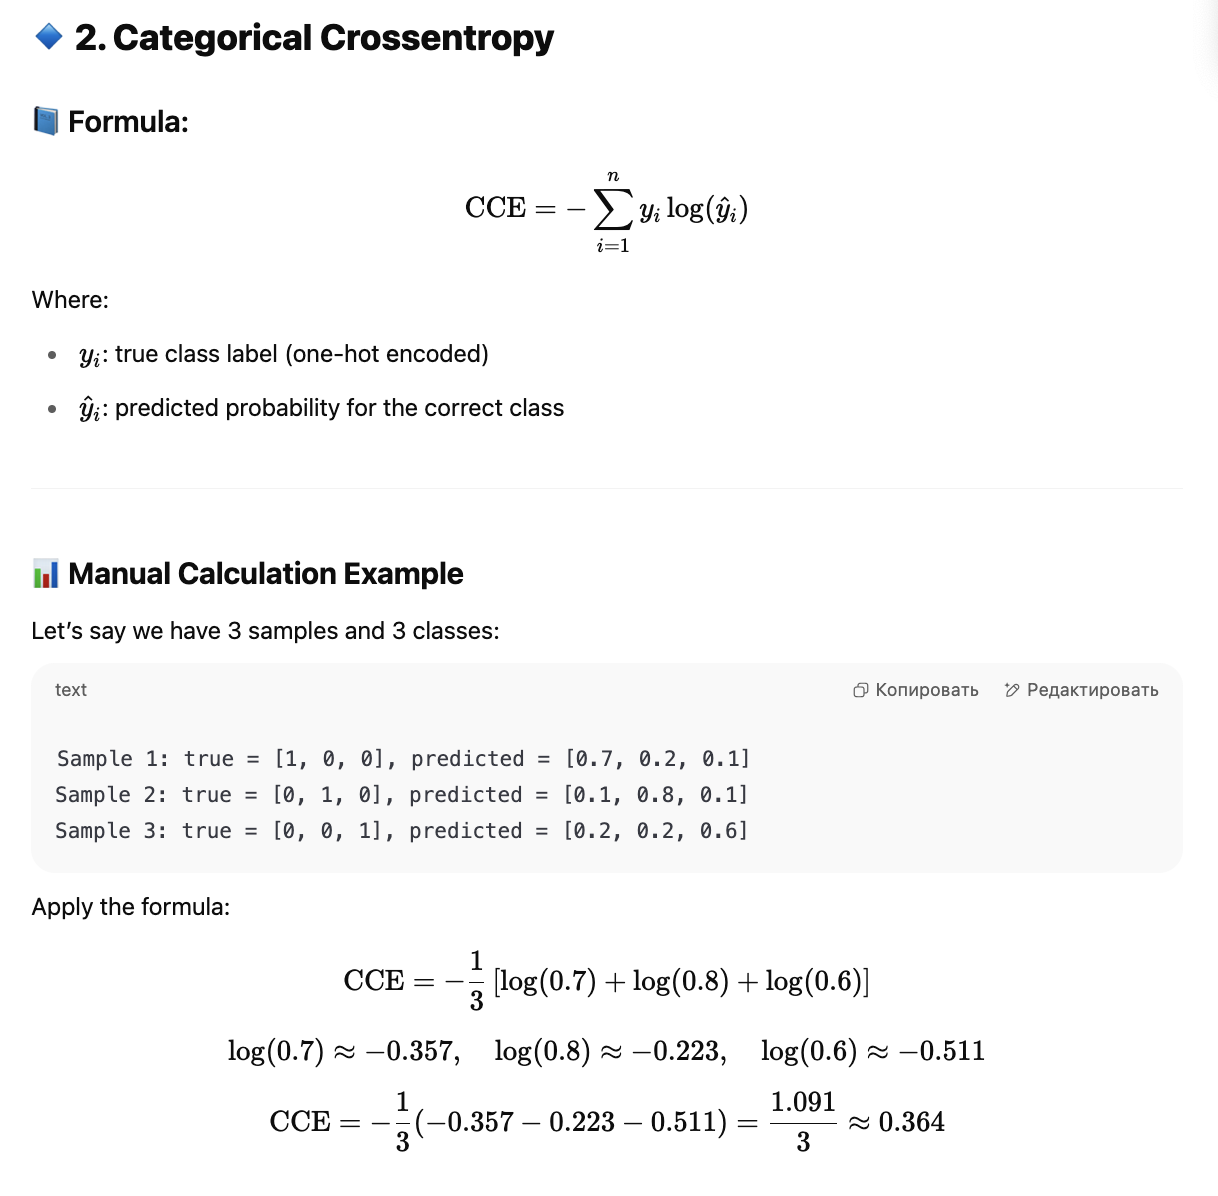

In [ ]:
import numpy as np

# True labels (one-hot encoded)
y_true_cat = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Predicted probabilities
y_pred_cat = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.8, 0.1],
    [0.2, 0.2, 0.6]
])

# Categorical Crossentropy
cce = -np.mean(np.sum(y_true_cat * np.log(y_pred_cat + 1e-15), axis=1))
print("Categorical Crossentropy:", cce)


Categorical Crossentropy: 0.3635480396729762


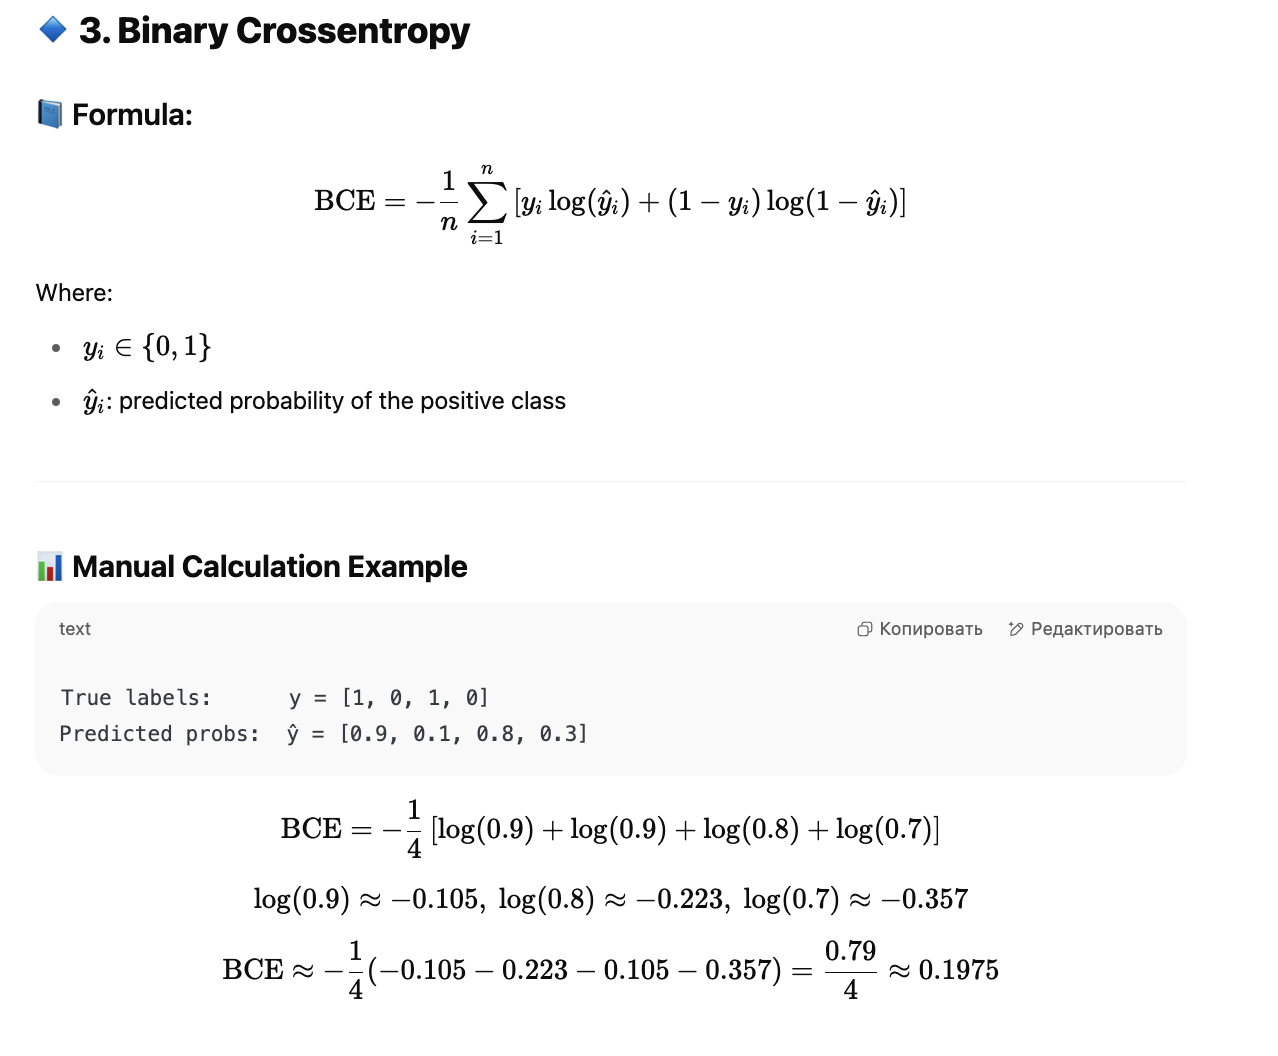

In [ ]:
# Binary true labels
y_true_bin = np.array([1, 0, 1, 0])
# Predicted probabilities
y_pred_bin = np.array([0.9, 0.1, 0.8, 0.3])

# Add epsilon to avoid log(0)
epsilon = 1e-15
y_pred_bin = np.clip(y_pred_bin, epsilon, 1 - epsilon)

# Binary Crossentropy calculation
bce = -np.mean(y_true_bin * np.log(y_pred_bin) + (1 - y_true_bin) * np.log(1 - y_pred_bin))
print("Binary Crossentropy:", bce)


Binary Crossentropy: 0.19763488164214868


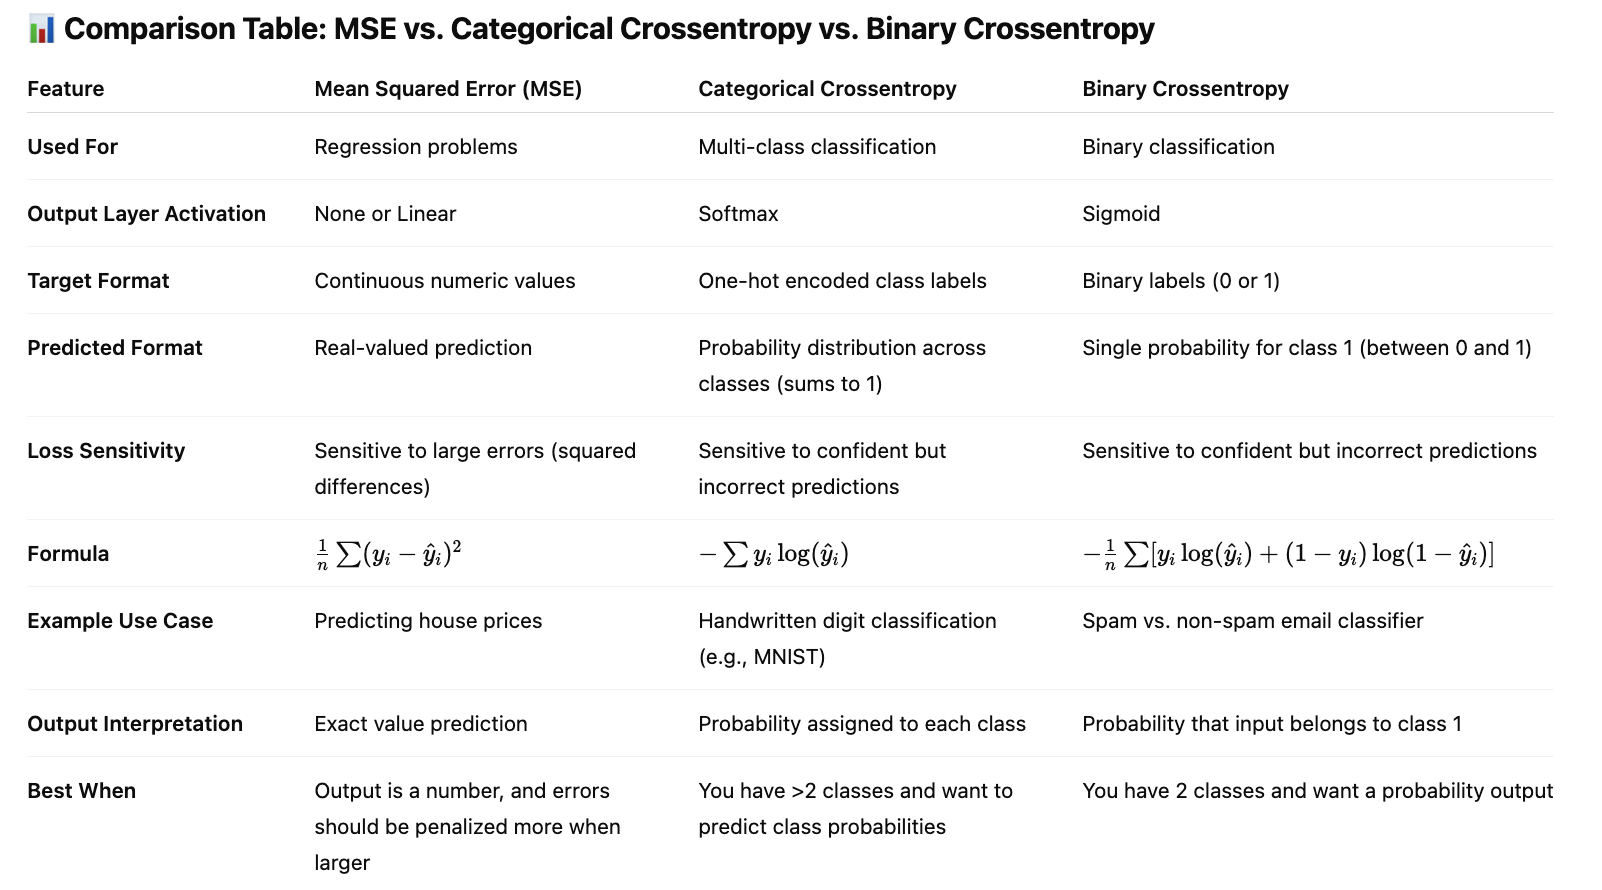

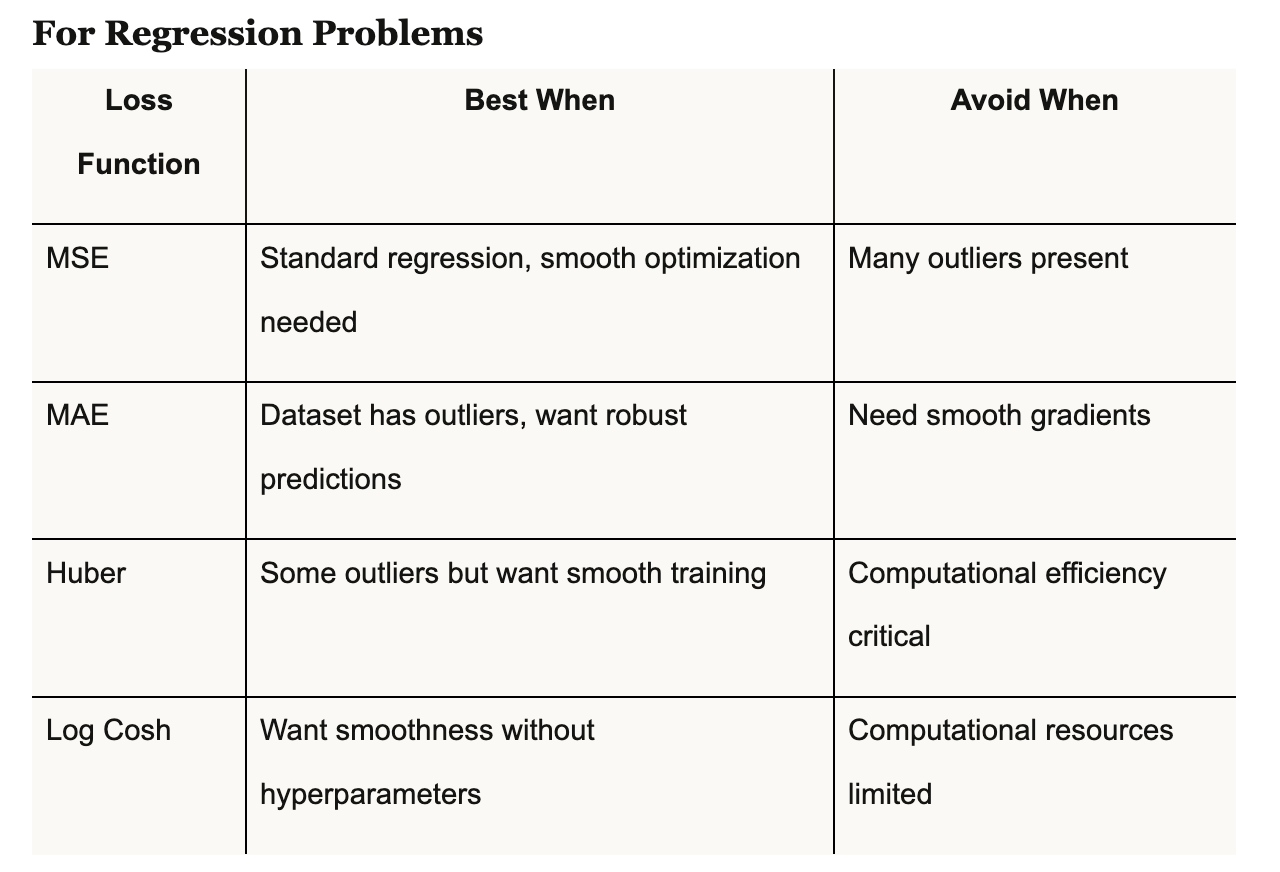

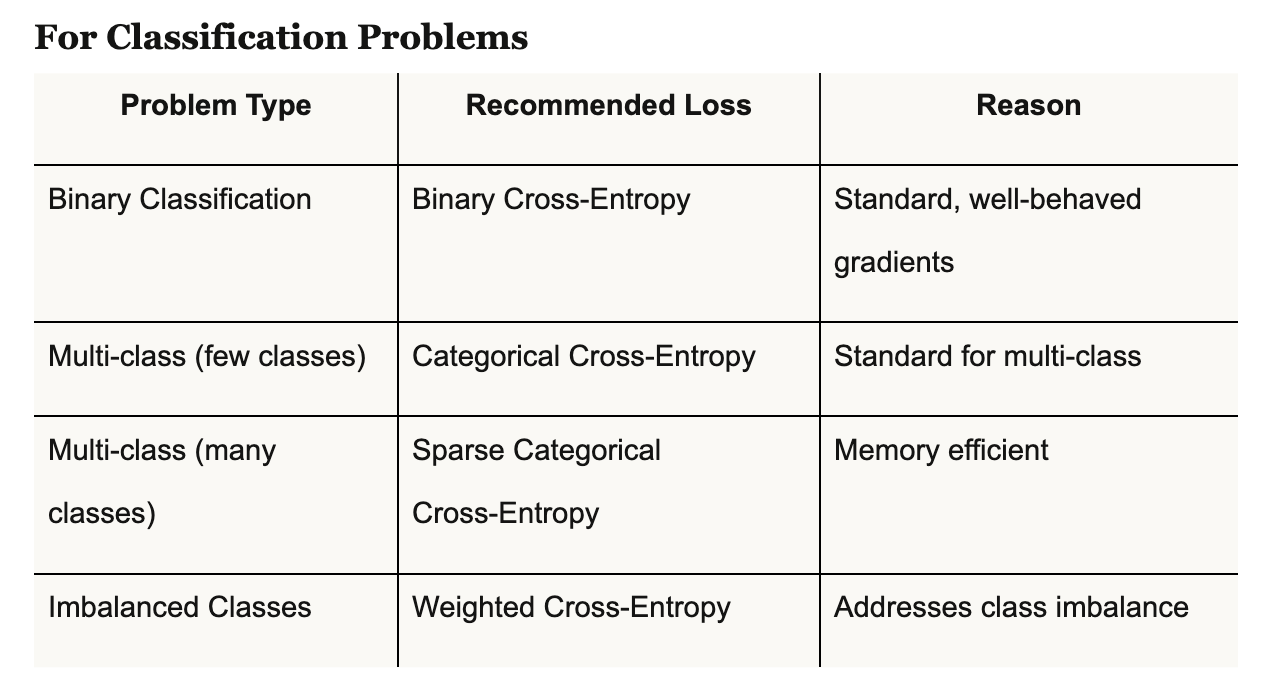

Training with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Momentum optimizer...
Training with RMSprop optimizer...
Training with Adam optimizer...


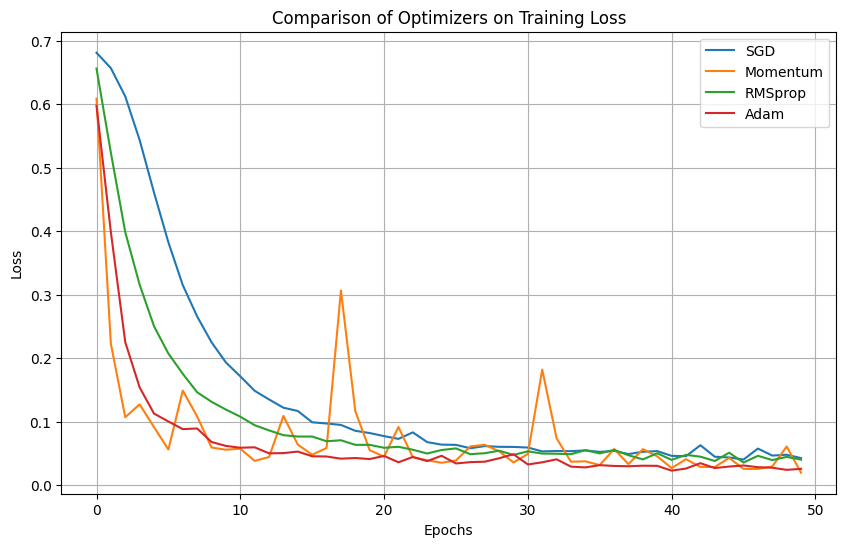

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)  # Simple decision boundary

# Define a simple neural network model
def create_model(optimizer):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(2,)),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.1),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.01),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.01)
}

# Train models and record histories
history_records = {}

for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = create_model(opt)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    history_records[opt_name] = history

# Plot training loss for each optimizer
plt.figure(figsize=(10, 6))
for opt_name, history in history_records.items():
    plt.plot(history.history['loss'], label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimizers on Training Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
%pip --quiet install tensorflow

Training with SGD optimizer…
Training with Momentum optimizer…
Training with RMSprop optimizer…
Training with Adam optimizer…


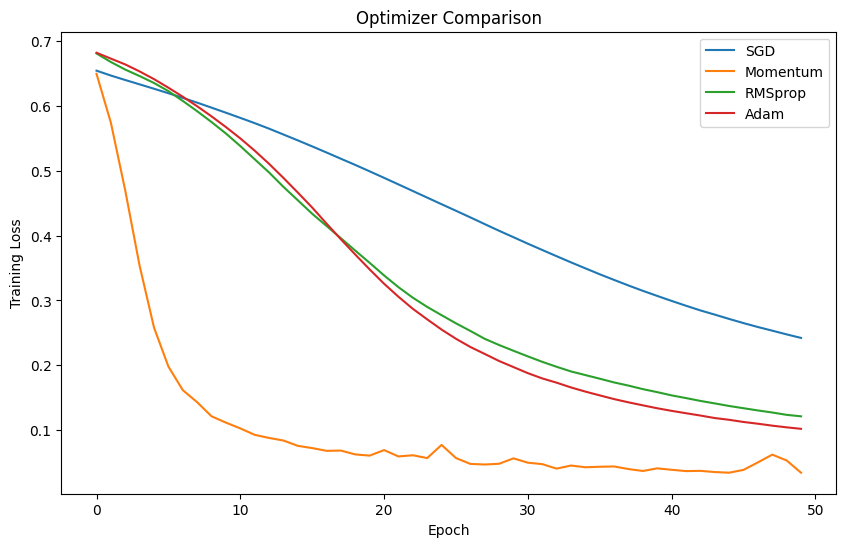

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)

# 2) Model factory using an explicit Input layer
def create_model(optimizer):
    model = keras.Sequential([
        keras.Input(shape=(2,)),           # avoids the input_shape warning
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# 3) Instantiate real optimizers instead of Ellipsis
optimizers = {
    'SGD':     tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum':tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam':    tf.keras.optimizers.Adam(learning_rate=0.001),
}

# 4) Train and collect histories
history_records = {}
for name, opt in optimizers.items():
    print(f"Training with {name} optimizer…")
    model = create_model(opt)
    hist = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    history_records[name] = hist.history['loss']

# 5) Plot
plt.figure(figsize=(10,6))
for name, losses in history_records.items():
    plt.plot(losses, label=name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Optimizer Comparison')
plt.legend()
plt.show()


Training with SGD optimizer…
Training with Momentum optimizer…
Training with RMSprop optimizer…
Training with Adam optimizer…


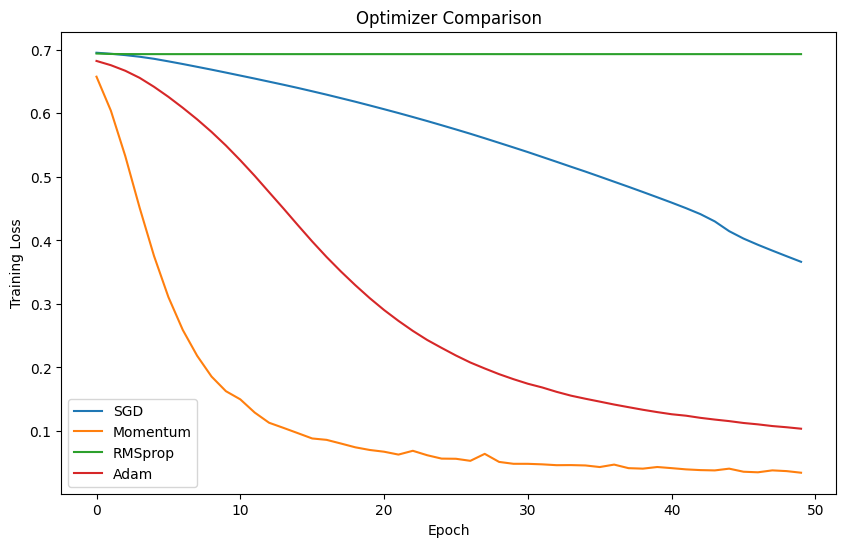

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)

# 2) Model factory using an explicit Input layer
def create_model(optimizer):
    model = keras.Sequential([
        keras.Input(shape=(2,)),           # avoids the input_shape warning
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# 3) Instantiate real optimizers instead of Ellipsis
optimizers = {
    'SGD':     tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum':tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam':    tf.keras.optimizers.Adam(learning_rate=0.001),
}

# 4) Train and collect histories
history_records = {}
for name, opt in optimizers.items():
    print(f"Training with {name} optimizer…")
    model = create_model(opt)
    hist = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    history_records[name] = hist.history['loss']

# 5) Plot
plt.figure(figsize=(10,6))
for name, losses in history_records.items():
    plt.plot(losses, label=name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Optimizer Comparison')
plt.legend()
plt.show()

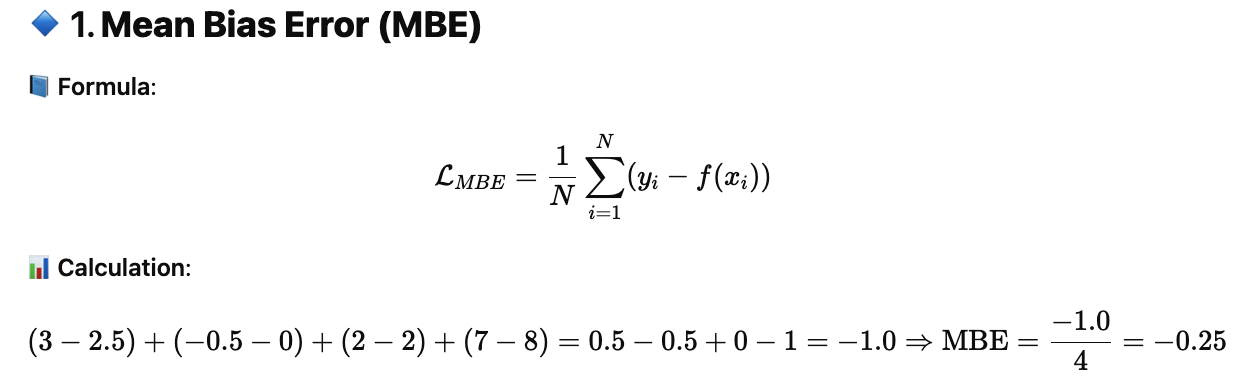

In [ ]:
import numpy as np

y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

mbe = np.mean(y_true - y_pred)
print("Mean Bias Error (MBE):", mbe)


Mean Bias Error (MBE): -0.25


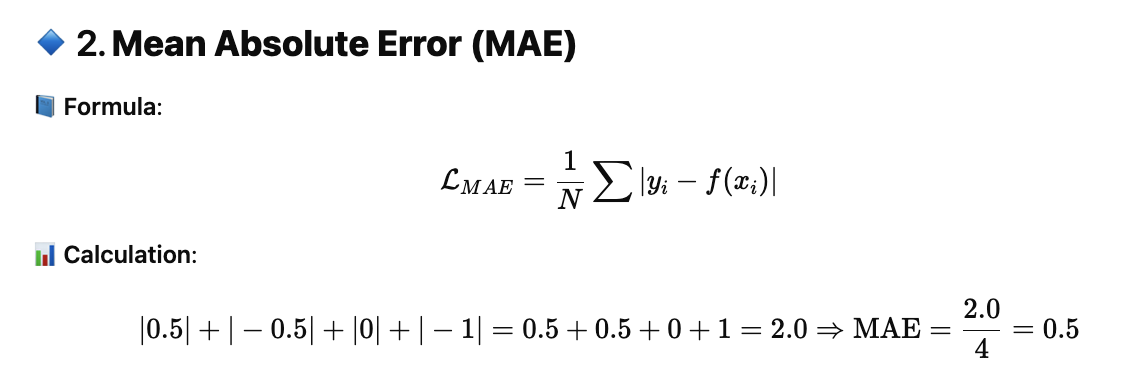

In [ ]:
mae = np.mean(np.abs(y_true - y_pred))
print("Mean Absolute Error (MAE):", mae)


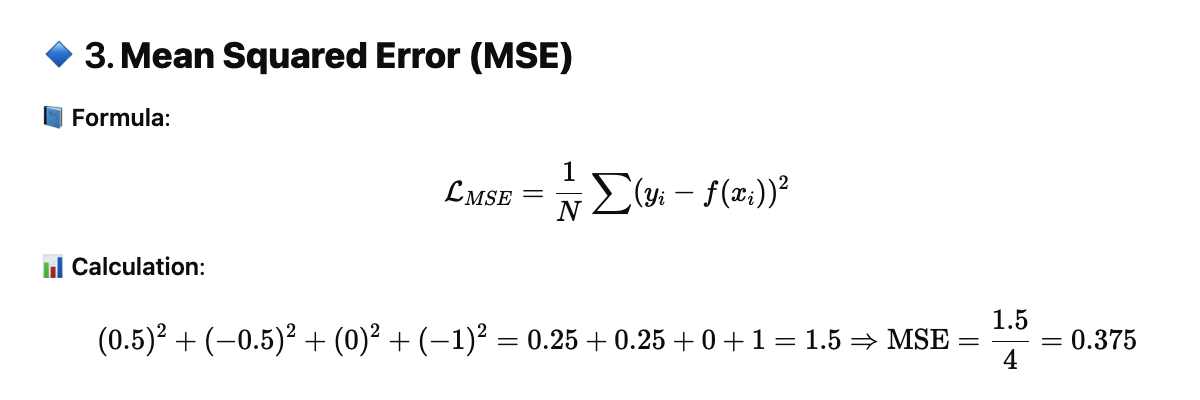

In [ ]:
mse = np.mean((y_true - y_pred)**2)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.375


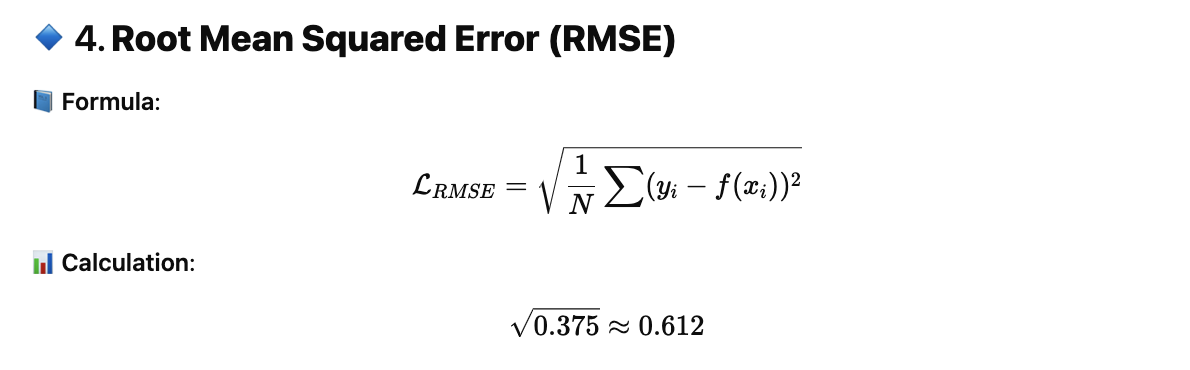

In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.6123724356957945


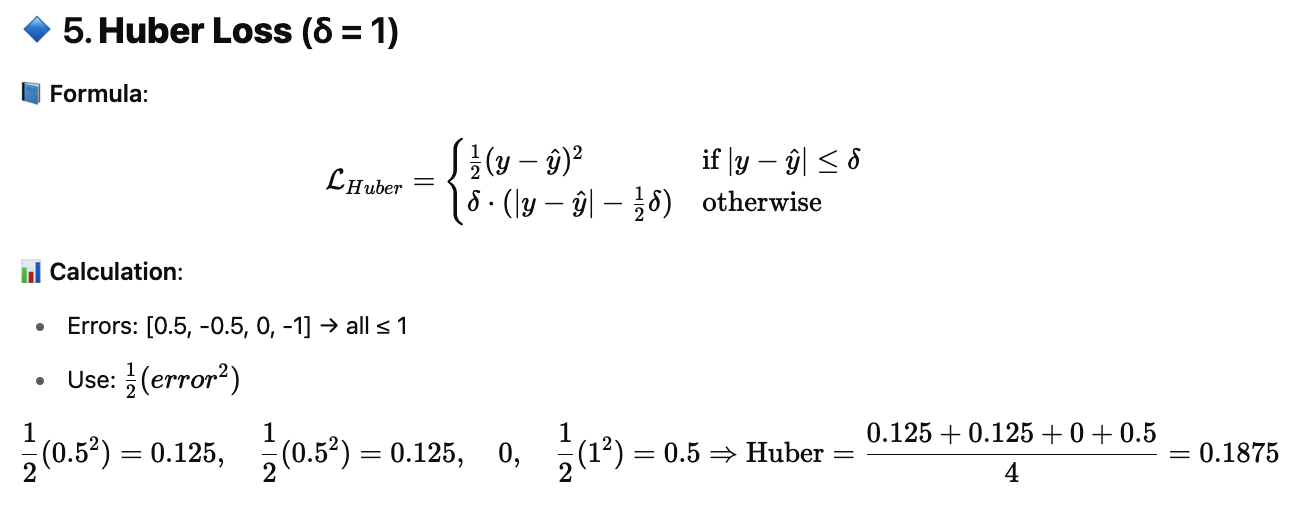

In [ ]:
delta = 1.0
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

print("Huber Loss:", huber_loss(y_true, y_pred))


Huber Loss: 0.1875


lesson 1